In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})
plt.rc('axes', axisbelow=True)

from utils.visualization import plot_median_errorbars

In [2]:
## BEiT models (bias: ?, weight tying: ?)
## masked image modeling (MIM) 
## randomly mask some percentage of image patches, and then predict the visual tokens corresponding to the masked patches
## (they masked patches of the image, very similar to BERT with MLM)
with open('../_data/fig-symmetry-vision-models/full-models/BEiT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/BEit.pkl', 'rb') as file:
    params = pickle.load(file)

BEiT_par = [params[key][0] for key in list(params.keys())]
BEiT_score = [models[key][-1].flatten() for key in list(models.keys())]

## DeiT models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/DeiT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/Deit.pkl', 'rb') as file:
    params = pickle.load(file)

DeiT_par = [params[key][0] for key in list(params.keys())]
DeiT_score = [models[key][-1].flatten() for key in list(models.keys())]

## ViT models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/ViT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/ViT.pkl', 'rb') as file:
    params = pickle.load(file)

ViT_par = [params[key][0] for key in list(params.keys())]
ViT_score = [models[key][-1].flatten() for key in list(models.keys())]

## ViT MAE models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/MAEDecoder-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/MAE.pkl', 'rb') as file:
    params = pickle.load(file)

MAE_par = [params[key][0] for key in list(params.keys())]
MAE_score = [models[key][-1].flatten() for key in list(models.keys())]

## DINO models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/DINO-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/DINO.pkl', 'rb') as file:
    params = pickle.load(file)

DINO_par = [params[key][0] for key in list(params.keys())]
DINO_score = [models[key][-1].flatten() for key in list(models.keys())]

## DIT models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/DIT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/DIT.pkl', 'rb') as file:
    params = pickle.load(file)

DIT_par = [params[key][0] for key in list(params.keys())]
DIT_score = [models[key][-1].flatten() for key in list(models.keys())]

## GIT (images) models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/GIT-images-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/GIT.pkl', 'rb') as file:
    params = pickle.load(file)

GIT_images_par = [params[key][0] for key in list(params.keys())]
GIT_images_score = [models[key][-1].flatten() for key in list(models.keys())]

'------------------------------------------'

## GIT (text) models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/GIT-text-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/GIT.pkl', 'rb') as file:
    params = pickle.load(file)

GIT_text_par = [params[key][0] for key in list(params.keys())]
GIT_text_score = [models[key][-1].flatten() for key in list(models.keys())]

## iG{T} (text) models (bias: ?, weight tying: ?)
with open('../_data/fig-symmetry-vision-models/full-models/iGPT-query-key.pkl', 'rb') as file:
    models = pickle.load(file)
with open('../_data/fig-parameters-vision-models/iGPT.pkl', 'rb') as file:
    params = pickle.load(file)

iGPT_par = [params[key][0] for key in list(params.keys())]
iGPT_score = [models[key][-1].flatten() for key in list(models.keys())]

/Users/matteosaponati/Desktop/repos/attention-geometry/utils/visualization.py:76: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(parameters[k], median, yerr = [[q1_range], [q2_range]],
/var/folders/yy/3fh2plpd0txg1y9llct3rsv80000gn/T/ipykernel_1992/2145028871.py:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  plot_median_errorbars(np.array(ViT_par)[[0,2,3,4,5,6,9]], np.array(ViT_score)[[0,2,3,4,5,6,9]], color = 'cornflowerblue')


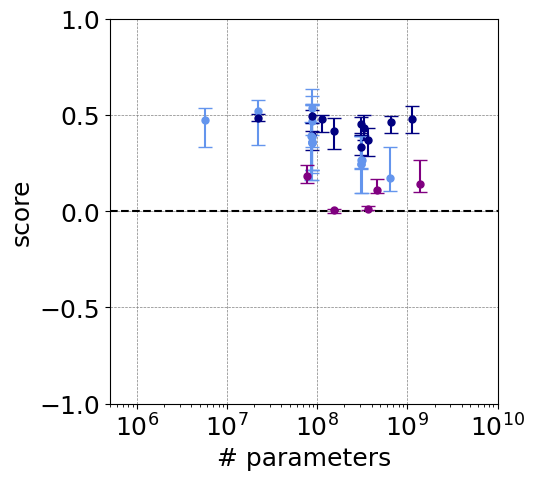

In [8]:
plt.figure(figsize=(5,5))

plot_median_errorbars(np.array(BEiT_par)[: 2], BEiT_score[: 2], color = 'navy')
plot_median_errorbars(np.array(BEiT_par)[2 :], BEiT_score[2 :], color = 'cornflowerblue')
plot_median_errorbars(DeiT_par, DeiT_score, color = 'cornflowerblue')
plot_median_errorbars(MAE_par, MAE_score, color = 'navy')
plot_median_errorbars(np.array(ViT_par)[[0,2,3,4,5,6,9]], np.array(ViT_score)[[0,2,3,4,5,6,9]], color = 'cornflowerblue')
plot_median_errorbars(DINO_par[4: ], DINO_score[4: ], color = 'navy')
plot_median_errorbars(GIT_images_par, GIT_images_score, color = 'navy')

plot_median_errorbars(iGPT_par, iGPT_score, color = 'purple')
plot_median_errorbars(GIT_text_par, GIT_text_score, color = 'purple')

plt.axhline(y=0.,linestyle='dashed',color='k')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.xscale('log')
plt.ylim(-1,1)
plt.ylabel('score')
plt.xlabel('# parameters')
plt.xlim(5e5,1e10)

plt.savefig('../figures/fig-pretrained-models-vision.pdf', format='pdf', dpi=300)